## Imports

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

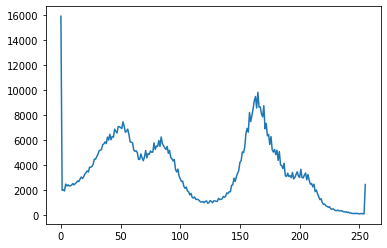

In [3]:
video = cv2.VideoCapture(0)
_, first_frame = video.read()
# cv2.imshow("frame1", first_frame)
# cv2.waitKey(0)
print(first_frame.shape)

x = 150
y = 150
width = 200
height = 200
roi = first_frame[y:y+height, x:x+width]
# cv2.imshow("ROI", roi)
# cv2.waitKey(0)

hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
roi_hist = cv2.calcHist([hsv_roi], [0], None, [256], [0, 256])
roi_hist = cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

term_criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

fig = plt.figure()
while True:
    _, frame = video.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.calcBackProject([hsv], [0], roi_hist, [0, 360], 1)
    
    _, track_window = cv2.meanShift(mask, (x, y, width, height), term_criteria)
    x, y, w, h = track_window
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
   
    cv2.imshow("Mask", mask)
   
    cv2.imshow("Frame", frame)
    
    clear_output(wait=True)
    histr = cv2.calcHist([frame],[0],None,[256],[0,256])
    
    plt.plot(histr)
    plt.show()
    
    
    key = cv2.waitKey(30)
    if key == 113: #esc
        video.release()
        cv2.destroyAllWindows()

        cv2.waitKey(1)
        break